## Assignment 2 Task 2

<strong>Name:</strong> Elroy Chua Ming Xuan </br>
<strong>UOW ID: </strong> 7431673 </br>
<strong>Data set: </strong> https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

#### Step 1: Preprocessing and Data Visualisation

In [13]:
#import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [32]:
df = pd.read_csv("magic04.data", header=None)
df.head(5)


,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


0    2.013652
1    3.371628
2    0.875507
3    0.485888
4    0.685695
5   -1.046441
6   -1.123078
7    0.120121
8    0.850890
9    0.229587
dtype: float64


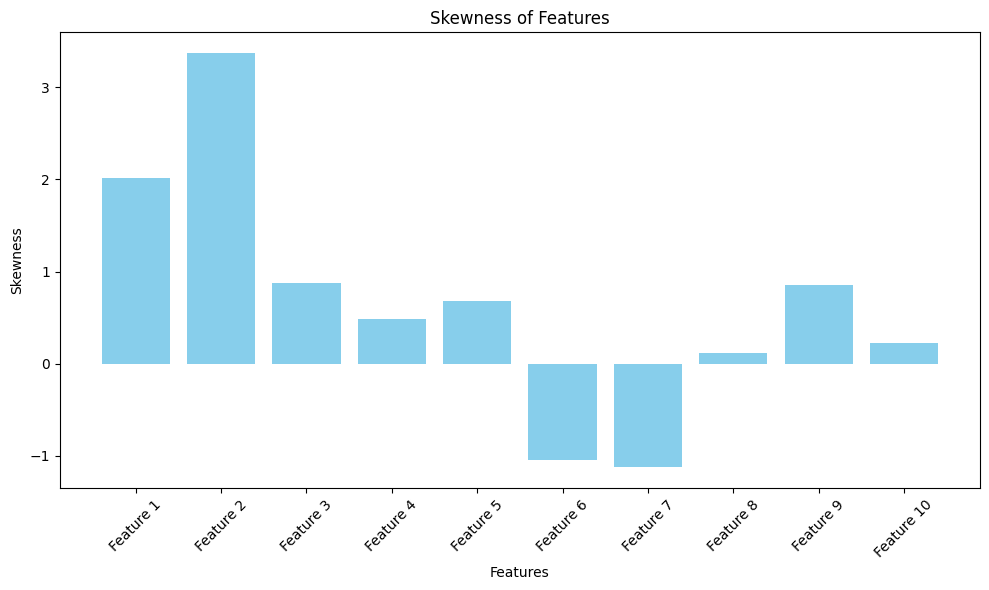

In [16]:
# Calculate skewness of each feature
import pandas as pd
import matplotlib.pyplot as plt
skewness = df.iloc[:, 0:10].skew(axis=0, skipna=True)
print(skewness)


# Create a DataFrame with skewness values and corresponding feature names
features = [f"Feature {i}" for i in range(1, 11)]
data = {'Feature': features, 'Skewness': skewness}
df_skewness = pd.DataFrame(data)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(df_skewness['Feature'], df_skewness['Skewness'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.title('Skewness of Features')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


#### Step 2: Pre Processing

In [17]:
X = df.iloc[:, 0:10]
X.head()


,0,1,2,3,4,5,6,7,8,9
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


In [18]:
y = df[10]


#### Step 2a: Perform scaling on the data

In [19]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

pd.DataFrame(X).describe()


,0,1,2,3,4,5,6,7,8,9
count,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04
mean,7.172671e-17,-1.195445e-16,-2.241460e-16,-3.025971e-16,1.128201e-16,-5.977226e-18,4.184058e-17,-9.712992e-18,1.195445e-17,-8.965839e-18
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,-1.155862e+00,-1.209064e+00,-1.869959e+00,-2.008809e+00,-1.939745e+00,-7.661315e+00,-6.712427e+00,-9.897993e+00,-1.059103e+00,-2.576420e+00
25%,-6.825213e-01,-5.623790e-01,-7.361978e-01,-7.905934e-01,-7.798731e-01,-2.745535e-01,-4.586055e-01,-5.329216e-01,-8.465631e-01,-6.868179e-01
50%,-3.800999e-01,-2.747838e-01,-1.807437e-01,-1.431941e-01,-1.643062e-01,1.409487e-01,9.350332e-02,1.999694e-02,-3.818041e-01,-2.631582e-02
75%,3.982656e-01,1.394619e-01,5.852541e-01,6.748758e-01,6.385776e-01,4.796163e-01,4.959385e-01,5.136004e-01,6.986894e-01,6.255307e-01
max,6.631304e+00,1.276608e+01,5.286407e+00,2.804429e+00,4.167511e+00,9.789330e+00,4.466292e+00,8.623528e+00,2.388785e+00,4.037785e+00


#### Step 2b: Encode Y column (g, h)


In [20]:
# Encode the columns manually
# Change 'g' to 1 and 'h' to 0
y = y.replace('g', 1)
y = y.replace('h', 0)

y.value_counts()


10
1    12332
0     6688
Name: count, dtype: int64

#### Step 2c: Split the data into training and testing sets


In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (2/3 training, 1/3 testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# See the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)


X_train shape: (12743, 10)
X_test shape: (6277, 10)
y_train shape: (12743,)
Y_test shape: (6277,)


#### Step 3: Keras Model


In [22]:
from keras.models import Sequential
from keras import layers

# Use ANN to predict gamma or hardon
# Use 2 hidden layers
# Any ANN architecture is allowed

model = Sequential([
    layers.Dense(16, activation='relu', input_shape=(10,)),  # 10 input neurons
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # 1 output neuron
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])


In [23]:
# Fit data into model
model_output = model.fit(X_train, y_train, epochs=10,
                         batch_size=10, validation_data=(X_test, y_test))


Epoch 1/10


1275/1275 [==============================] - 1s 546us/step - loss: 0.4350 - accuracy: 0.7976 - val_loss: 0.3701 - val_accuracy: 0.8397
Epoch 2/10
1275/1275 [==============================] - 1s 475us/step - loss: 0.3588 - accuracy: 0.8500 - val_loss: 0.3470 - val_accuracy: 0.8545
Epoch 3/10
1275/1275 [==============================] - 1s 482us/step - loss: 0.3415 - accuracy: 0.8572 - val_loss: 0.3377 - val_accuracy: 0.8577
Epoch 4/10
1275/1275 [==============================] - 1s 511us/step - loss: 0.3345 - accuracy: 0.8603 - val_loss: 0.3335 - val_accuracy: 0.8657
Epoch 5/10
1275/1275 [==============================] - 1s 491us/step - loss: 0.3292 - accuracy: 0.8625 - val_loss: 0.3242 - val_accuracy: 0.8654
Epoch 6/10
1275/1275 [==============================] - 1s 504us/step - loss: 0.3246 - accuracy: 0.8650 - val_loss: 0.3211 - val_accuracy: 0.8662
Epoch 7/10
1275/1275 [==============================] - 1s 608us/step - loss: 0.3219 - accuracy: 0.8668 - val_loss: 0.3185 - val_accura

#### Step 4: Evaluate the model

##### Step 4a: Evalute the model using the training data

In [24]:
# evaluating and predicting the model
model.evaluate(X_train, y_train)
model.predict(X_train)


399/399 [==============================] - 0s 241us/step


array([[0.9870982 ],
       [0.91422385],
       [0.41936666],
       ...,
       [0.82680446],
       [0.62790924],
       [0.9837348 ]], dtype=float32)

#### Step 4b: Evalute the model using the testing data

In [25]:
# evaluating and predicting the model
model.evaluate(X_test, y_test)
model.predict(X_test)


197/197 [==============================] - 0s 280us/step


array([[0.80010927],
       [0.9947954 ],
       [0.10353739],
       ...,
       [0.47862267],
       [0.8210229 ],
       [0.00343972]], dtype=float32)

#### Accuracy of Training data: 0.8694
#### Accuracy of Testing data: 0.8678

#### Step 5: Hyperparameter Tuning

In [27]:
from scikeras.wrappers import KerasClassifier
from keras.layers import Dense


def create_model(n_hidden=2, n_neurons=16, a=0.01, b=0.01, input_shape=[10]):
    model = Sequential()

    # Input layer
    model.add(keras.layers.Dense(
        n_neurons, activation='relu', input_shape=input_shape))

    # Hidden layers
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu',
                                     kernel_regularizer=keras.regularizers.l1_l2(l1=a, l2=b)))

    # Output layer
    model.add(keras.layers.Dense(1))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
    return model


# Create a KerasRegressor with the build_model function
model_fine_tune = KerasClassifier(model=create_model, verbose=0)


In [28]:
# Using GridSearchCV to find the best params for the model
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    'n_hidden': [1, 2, 5],
    'n_neurons': [10, 16, 20],
    'a': [0.1, 0.001],
    'b': [0.1, 0.001]
}


In [29]:
model_fine_tune.get_params().keys()


dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])

In [30]:
# Create parameter grid that is valid
param_grid = {
    'batch_size': [5, 10, 15],
    'epochs': [50, 100],
    'optimizer': ['adam', 'sgd']
}

# Using GridSearchCV to find the best params for the model
grid = GridSearchCV(estimator=model_fine_tune, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train, y_train, validation_data=(X_test, y_test))
grid_result.best_params_
grid_result.best_score_


0.8639259524312488

In [31]:
print('RESULTS:')
print("Best parameters: %s" % grid_result.best_params_)
print("Best score: %f" % grid_result.best_score_)
print("Best estimator: %s" % grid_result.best_estimator_)
print("Scorer: %s" % grid_result.scorer_)


RESULTS:
Best parameters: {'batch_size': 15, 'epochs': 100, 'optimizer': 'sgd'}
Best score: 0.863926
Best estimator: KerasClassifier(
	model=<function create_model at 0x281314c10>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=sgd
	loss=None
	metrics=None
	batch_size=15
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
	class_weight=None
)
Scorer: <sklearn.metrics._scorer._PassthroughScorer object at 0x283055840>


#### Step 6: Result Analysis
1. Best parameters for Scikeras' KerasClassifier:
- batch_size: 15
- epochs: 100
- optimizer: sgd
This results in best score of 0.863926
2. Difference before fine tuning:
- Accuracy of Training data: 0.8694
- Accuracy of Testing data: 0.8678